In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn.apionly as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from sklearn.linear_model import LogisticRegression
from collections import Counter
import random
import seaborn as sb
import matplotlib.colors as colors
%matplotlib notebook

In [2]:
df=pd.read_csv("ADNIMERGE.csv")

In [3]:
df=df.sort_values(["RID","EXAMDATE"])

In [4]:
df["PTGENDER"]=(df["PTGENDER"]=="Male")*1
#1: Male 0:female

In [5]:
df=df.reset_index(drop=True)

In [6]:
ID_list=list(pd.Series.unique(df["RID"]))
#1784 patients, 15 of them do not have baseline diagnosis

In [7]:
ID_count=Counter(list(df["RID"]))

In [8]:
id_pos={}
cumu=0
for pid in ID_list:
    id_pos[pid]=cumu
    cumu=cumu+ID_count[pid]
#id_pos: id-the index(in the EHR csv file) of the first record

In [9]:
df[["RID","EXAMDATE","AGE","PTGENDER","PTEDUCAT","PTETHCAT","PTRACCAT",'PTMARRY',"MMSE"]]

,RID,EXAMDATE,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY,MMSE
0,2,2005-09-08,74.3,1,16,Not Hisp/Latino,White,Married,28.0
1,2,2006-03-06,74.3,1,16,Not Hisp/Latino,White,Married,28.0
2,2,2008-08-27,74.3,1,16,Not Hisp/Latino,White,Married,29.0
3,2,2010-09-22,74.3,1,16,Not Hisp/Latino,White,Married,28.0
4,2,2011-03-04,74.3,1,16,Not Hisp/Latino,White,Married,NaN
5,2,2011-09-19,74.3,1,16,Not Hisp/Latino,White,Married,23.0
6,2,2012-03-22,74.3,1,16,Not Hisp/Latino,White,Married,NaN
7,2,2012-09-26,74.3,1,16,Not Hisp/Latino,White,Married,24.0
8,2,2013-03-25,74.3,1,16,Not Hisp/Latino,White,Married,NaN
9,2,2013-09-09,74.3,1,16,Not Hisp/Latino,White,Married,25.0


In [10]:
df_uniq=df.loc[id_pos.values()]

In [11]:
df_adni1_bl=df_uniq[df_uniq["ORIGPROT"]=="ADNI1"]

In [12]:
#baseline diagosis stratified by gender 

In [13]:
df_adni1_bl_wt=df_adni1_bl[df_adni1_bl.PTRACCAT=="White"]

In [14]:
df_adni1_bl_wt.to_csv("baseline_adni1_white_df.csv")

In [15]:
df_adni1_bl_wt.groupby(["DX_bl","PTGENDER"]).count()["RID"]

DX_bl  PTGENDER
AD     0            80
       1            96
CN     0            97
       1           113
LMCI   0           135
       1           241
Name: RID, dtype: int64

In [16]:
#df_uniq.to_csv("baseline_df.csv")

In [17]:
#longitudinal matrix extraction
dxdict={}
for i in range(len(ID_list)):
    if i<(len(ID_list)-1):
        dxdict[ID_list[i]]=df[["RID","EXAMDATE","MMSE","DX"]].iloc[id_pos[ID_list[i]]:id_pos[ID_list[i+1]],:]
    else:
        dxdict[ID_list[i]]=df[["RID","EXAMDATE","MMSE","DX"]].iloc[id_pos[ID_list[i]]:,:]

In [18]:
random_pid=random.choices(list(dxdict.keys()),k=35)

<IPython.core.display.Javascript object>


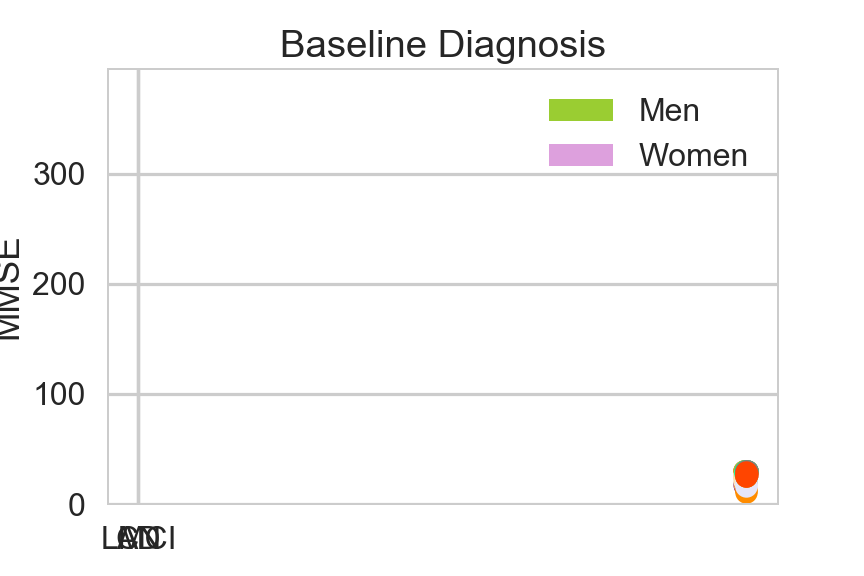

In [19]:
random.seed(31)
for pid in random_pid:
    profile=dxdict[pid].dropna(axis=0,how="any")
    plt.plot_date(profile["EXAMDATE"],profile["MMSE"],fmt="-",marker="o",label=pid,color=random.choice(list(colors.cnames.values())))
plt.legend(prop={'size': 4})
plt.ylabel("MMSE")
plt.title("Traceplots of MMSE over Time(N=35)")

In [20]:
mens=[]
womens=[]
for dx in ["CN","LMCI","AD"]:
    mens.append(df_adni1_bl_wt.groupby(["DX_bl","PTGENDER"]).count()["RID"].loc[dx].loc[1])
    womens.append(df_adni1_bl_wt.groupby(["DX_bl","PTGENDER"]).count()["RID"].loc[dx].loc[0])

In [21]:
p1=plt.bar([1,2,3],mens,color="yellowgreen")
p2=plt.bar([1,2,3],womens,bottom=mens,color="plum")
plt.xticks([1,2,3],["CN","LMCI","AD"])
plt.title("Baseline Diagnosis")
plt.legend((p1[0],p2[0]),("Men","Women"));

In [22]:
race_list=list(df_uniq.groupby("PTRACCAT").count()["RID"].index)

In [23]:
race_count=df_uniq.groupby("PTRACCAT").count()["RID"].values

In [24]:
race_list

['Am Indian/Alaskan',
 'Asian',
 'Black',
 'Hawaiian/Other PI',
 'More than one',
 'Unknown',
 'White']

<IPython.core.display.Javascript object>


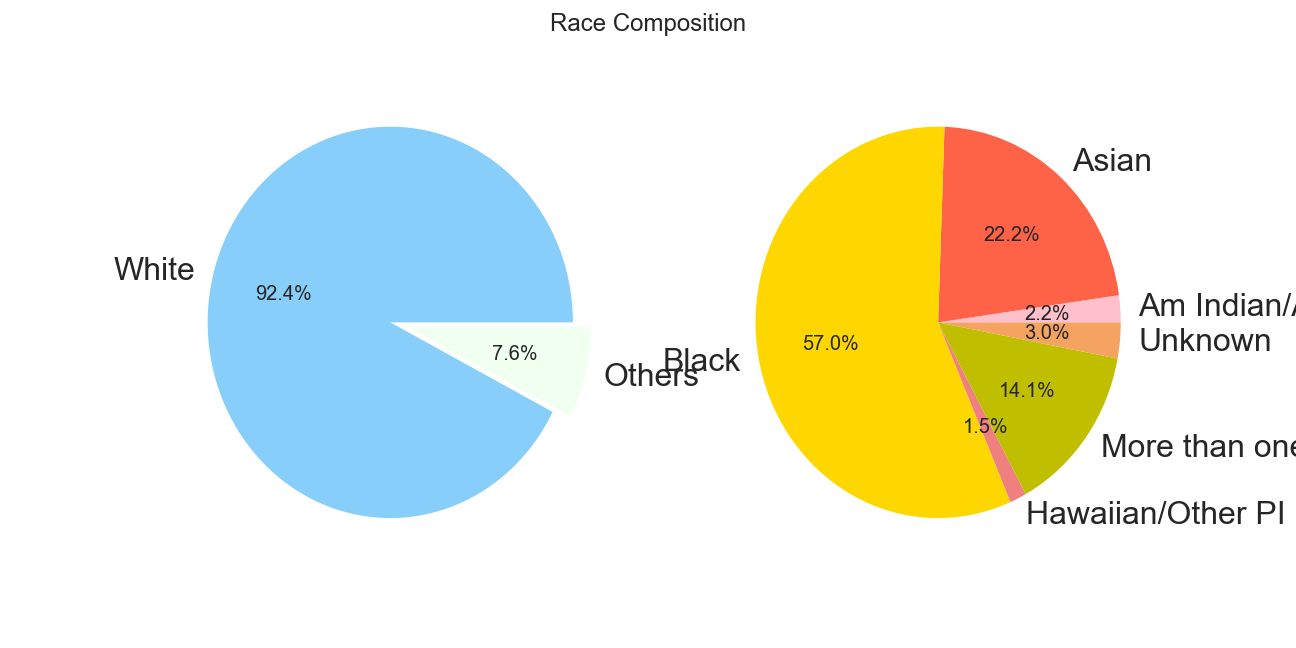

In [25]:
plt.figure(figsize=(9,4.5))
plt.suptitle("Race Composition")
plt.subplot(1,2,1)
plt.pie([race_count[-1],sum(race_count[0:6])],labels=["White","Others"],explode = (0,0.1),\
        colors = [ 'lightskyblue',"honeydew"],\
       autopct='%1.1f%%')
plt.subplot(1,2,2)
plt.pie(race_count[0:6],labels=race_list[0:6],colors=['pink', "tomato",'gold', 'lightcoral',"y","sandybrown"],\
       autopct='%1.1f%%');

In [26]:
#education score:4-20
df["PTEDUCAT"].describe()

count    13017.000000
mean        15.994930
std          2.824862
min          4.000000
25%         14.000000
50%         16.000000
75%         18.000000
max         20.000000
Name: PTEDUCAT, dtype: float64

In [27]:
dfbase = pd.read_csv("baseline_df.csv")
dfbase = dfbase[dfbase.ORIGPROT == "ADNI1"]
dfbase = dfbase[dfbase.PTRACCAT =="White"]

In [28]:
predictors = ["Ventricles","Hippocampus","WholeBrain","Entorhinal","Fusiform","MidTemp"]

<IPython.core.display.Javascript object>


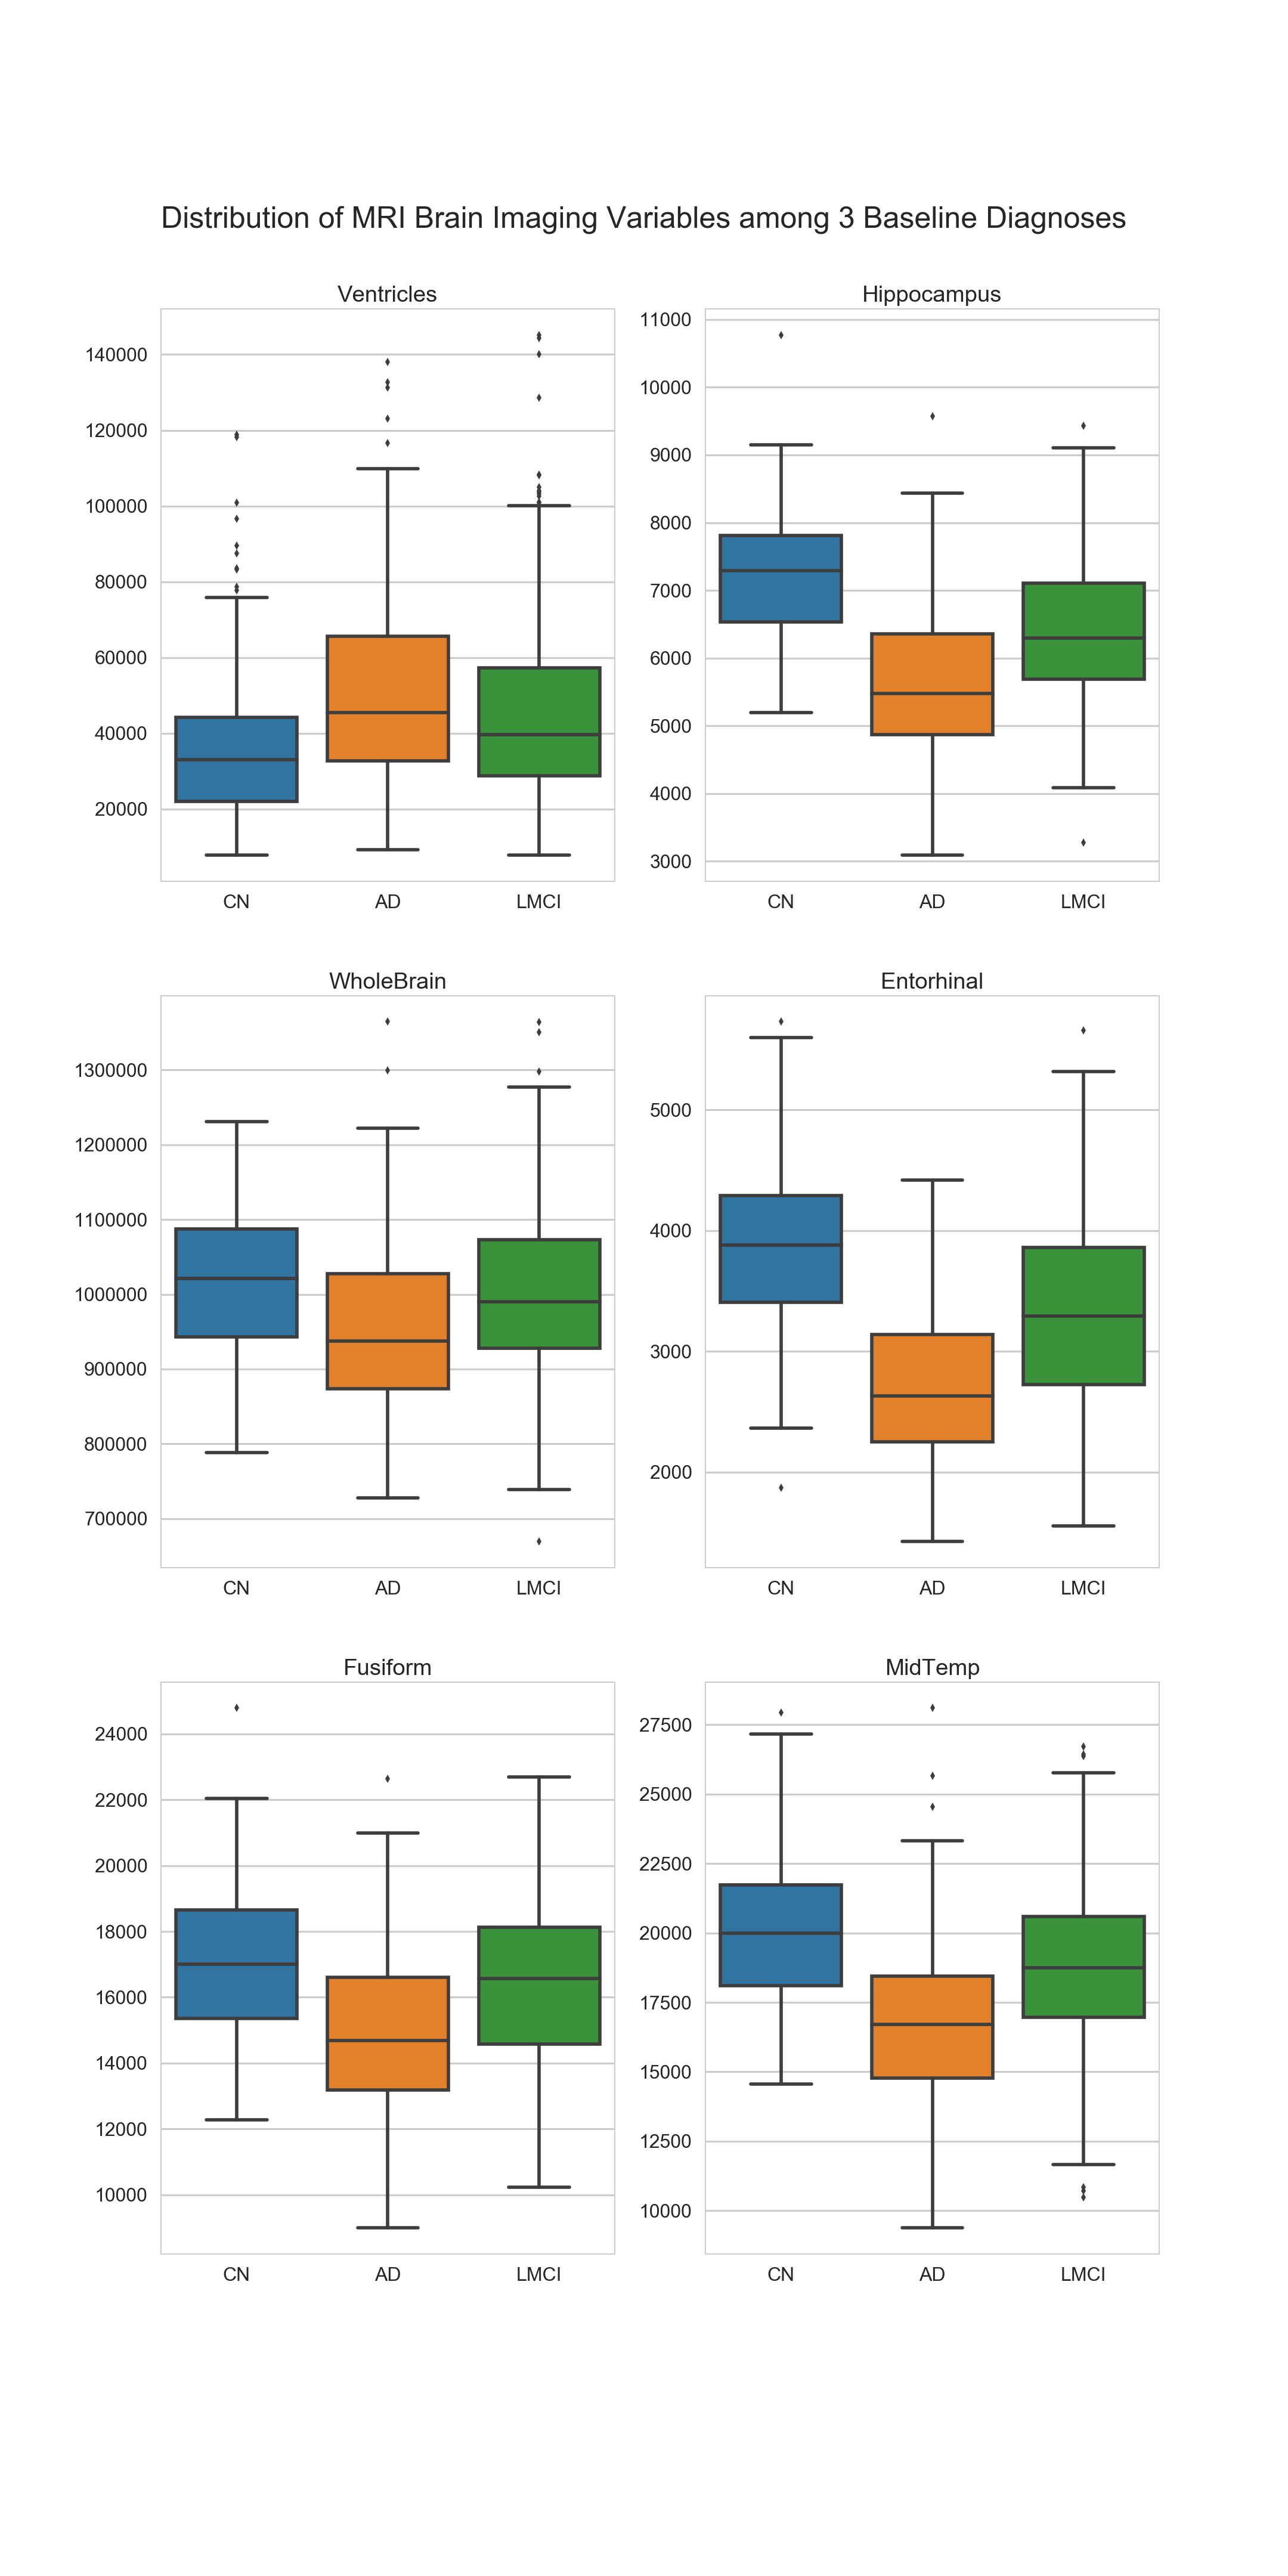

In [29]:
plt.figure(figsize = (15,30))
plt.suptitle("Distribution of MRI Brain Imaging Variables among 3 Baseline Diagnoses", fontsize=25, y = 0.92)

for i,p in enumerate(predictors):
    plt.subplot(len(predictors)/2,2,i+1)
    a = sns.boxplot(x = 'DX_bl', y=p, data= dfbase)
    a.set_xlabel("")
    a.set_ylabel("")
    a.set_title(p)